# Airline Passenger Satisfaction - Veri Analizi Projesi

# ✈️ Bölüm 1: Giriş ve Veri Seti Tanıtımı

Bu proje, yolcu memnuniyetini etkileyen faktörleri anlamak amacıyla hazırlanmıştır. "Airline Passenger Satisfaction" veri seti, uçuş öncesi ve uçuş sırasındaki hizmet kalitesi, bekleme süresi, personel davranışı gibi birçok değişkeni içermektedir. Proje kapsamında hem temel istatistiksel analizler hem de ileri düzey veri analiz teknikleri uygulanacaktır.

### Proje Adımları:
- Veri setinin incelenmesi ve temizlenmesi
- Eksik ve aykırı değerlerin analiz edilmesi
- Sayısal ve kategorik değişkenlerin görselleştirilmesi
- Memnuniyet düzeyini etkileyen değişkenler için hipotez testleri yapılması
- (Opsiyonel) Basit bir sınıflandırma modeli ile memnuniyet tahmini yapılması

# 🔍 Bölüm 2: Veri Ön İnceleme ve Değişken Türleri

Veri seti iki dosyadan oluşmaktadır: `train.csv` ve `test.csv`. Bu analizde, `train.csv` dosyası kullanılacaktır çünkü memnuniyet (`satisfaction`) değişkeni yalnızca bu dosyada etiketlenmiştir.

Veri setinde 25 sütun ve yaklaşık 100.000 satır bulunmaktadır. Hedef değişken `satisfaction`, yolcunun uçuş deneyimi sonunda memnun olup olmadığını belirtmektedir. Diğer değişkenler uçuş süresi, uçuş sınıfı, hizmet kalitesi gibi faktörleri içermektedir.

In [29]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Uyarı gizleme
import warnings
warnings.filterwarnings("ignore")

# Dosyayı oku
df = pd.read_csv("train.csv")

# İlk 5 satırı görüntüle
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### İlk 5 Satırın İncelenmesi

Veri seti her bir yolcuyu temsil eden satırlardan oluşmakta. Değişkenler arasında `Customer Type`, `Class`, `Inflight entertainment`, `Flight Distance` gibi memnuniyeti etkileyebilecek çok sayıda değişken yer alıyor.

Hedef değişkenimiz: `satisfaction`, iki kategoriden oluşuyor:
- `satisfied`
- `neutral or dissatisfied`

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Veri Yapısı ve Veri Tipleri

Veri seti toplamda 25 sütundan oluşmakta. Gözlem sayısı yaklaşık olarak 100.000’dir.

Bazı değişkenlerde `float` türünde eksik değerler olduğu gözlemlenmiştir. Özellikle `Arrival Delay in Minutes` ve `Departure Delay in Minutes` gibi sütunlar bu açıdan kontrol edilmelidir.


In [31]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### Eksik Veri Kontrolü

Veri setinde az sayıda eksik veri bulunmaktadır. Bu eksik değerler modelleme ve analiz üzerinde etkili olabileceğinden, bir sonraki adımda detaylı şekilde incelenip uygun yöntemlerle doldurulacaktır.


In [32]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Sayısal Değişkenlerin İstatistiksel Özeti

Yukarıdaki tabloda veri setindeki sayısal değişkenlerin temel istatistiksel ölçümleri yer almaktadır. Bu ölçümler arasında:

- **count**: Gözlem sayısı
- **mean**: Ortalama
- **std**: Standart sapma
- **min / max**: Minimum ve maksimum değer
- **25%, 50%, 75%**: Çeyreklikler (Q1, Medyan, Q3)

Özellikle `Flight Distance`, `Departure Delay in Minutes` ve `Arrival Delay in Minutes` gibi sütunlarda geniş bir dağılım gözlemlenmektedir. Bu değişkenler ileride hem aykırı değer analizinde hem de görselleştirme kısmında detaylı incelenecektir.


### Değişken Türlerinin Belirlenmesi

Veri seti hem sayısal hem de kategorik değişkenlerden oluşmaktadır.

- **Kategorik Değişkenler:** Yolcunun cinsiyeti, müşteri tipi, uçuş sınıfı, seyahat türü gibi sınıflandırılabilir (nominal/ordinal) değişkenlerdir. Bu değişkenler genellikle görselleştirme ve grup karşılaştırmalarında kullanılacaktır.

- **Sayısal Değişkenler:** Yaş, uçuş mesafesi, uçuş içi hizmet puanları ve gecikme süreleri gibi sürekli (continuous) değişkenlerdir. Bu değişkenler üzerinde istatistiksel özet, aykırı değer analizi ve hipotez testleri gerçekleştirilecektir.

Bu ayrım, veri setinin görselleştirilmesi ve analizinde hangi tür grafiklerin kullanılacağını belirlemek açısından önemlidir.


In [33]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Kategorik Değişkenler:")
print(categorical_cols)

print("\nSayısal Değişkenler:")
print(numerical_cols)

Kategorik Değişkenler:
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

Sayısal Değişkenler:
Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


### Hedef Değişkenin Dağılımı: `satisfaction`

Veri setinin hedef değişkeni olan `satisfaction`, yolcunun uçuş deneyiminden memnun olup olmadığını belirtir. 

Görselleştirmeden de görülebileceği gibi, veriler iki sınıfa ayrılmıştır:
- `neutral or dissatisfied` (nötr ya da memnun olmayanlar)
- `satisfied` (memnun olanlar)

Bu iki sınıf arasındaki dağılım, sınıflandırma modellerinde **dengesizlik (class imbalance)** olup olmadığını değerlendirmek için önemlidir.


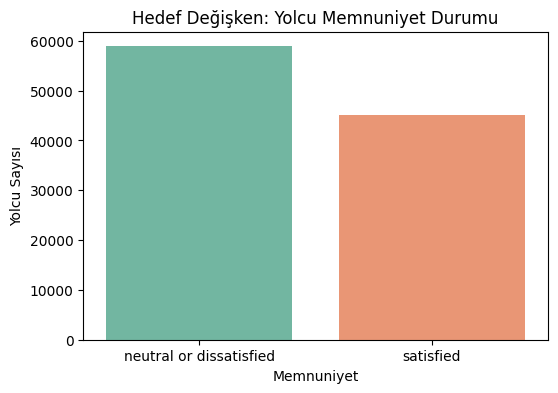

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x="satisfaction", data=df, palette="Set2")
plt.title("Hedef Değişken: Yolcu Memnuniyet Durumu")
plt.xlabel("Memnuniyet")
plt.ylabel("Yolcu Sayısı")
plt.show()

In [35]:
df["satisfaction"].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

### Yolcu Sınıfı ile Memnuniyet İlişkisi

Grafikte görüldüğü üzere, **Business class** yolcularının büyük çoğunluğu memnunken, **Eco** ve **Eco Plus** sınıflarında memnuniyet oranı düşmektedir. Bu durum uçuş konforunun memnuniyet üzerinde doğrudan etkili olabileceğini düşündürmektedir.

İlerleyen adımlarda bu değişken üzerinden hipotez testi yapılacaktır.


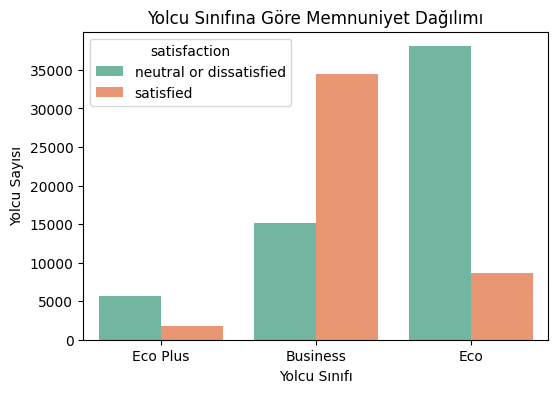

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", hue="satisfaction", data=df, palette="Set2")
plt.title("Yolcu Sınıfına Göre Memnuniyet Dağılımı")
plt.xlabel("Yolcu Sınıfı")
plt.ylabel("Yolcu Sayısı")
plt.show()

### Müşteri Tipi ile Memnuniyet İlişkisi

Grafikten, **Loyal (sadık) müşterilerin** memnuniyet oranının daha yüksek olduğu, **disloyal (sadık olmayan)** müşterilerin ise büyük çoğunlukla memnuniyetsiz olduğu görülmektedir.

Bu fark, müşteri sadakatinin hizmet algısı ve memnuniyet üzerinde etkili olabileceğini göstermektedir.


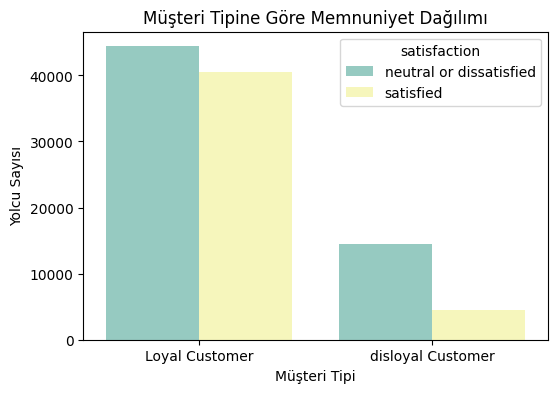

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Customer Type", hue="satisfaction", data=df, palette="Set3")
plt.title("Müşteri Tipine Göre Memnuniyet Dağılımı")
plt.xlabel("Müşteri Tipi")
plt.ylabel("Yolcu Sayısı")
plt.show()

### Seyahat Türü ile Memnuniyet İlişkisi

Grafikte **Business travel (iş amaçlı seyahat)** yapan yolcuların memnuniyet oranının daha yüksek olduğu görülmektedir. **Personal Travel** yapan yolcular ise daha çok memnuniyetsizdir.

Bu farkın nedeni, iş seyahatinde şirket destekli yolculuklar (örneğin business class gibi) olabilir.


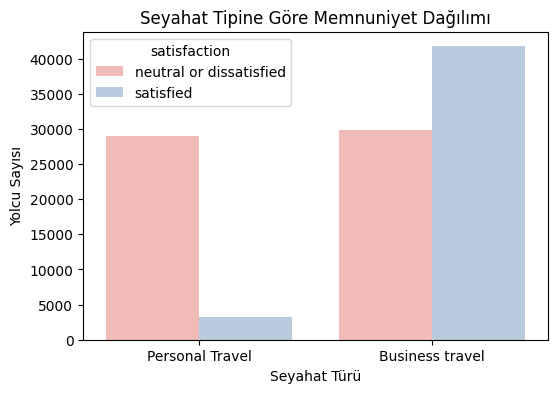

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Type of Travel", hue="satisfaction", data=df, palette="Pastel1")
plt.title("Seyahat Tipine Göre Memnuniyet Dağılımı")
plt.xlabel("Seyahat Türü")
plt.ylabel("Yolcu Sayısı")
plt.show()

# 🧼 Bölüm 3: Eksik Değer Analizi

In [39]:
missing_counts = df.isnull().sum()

# Sadece eksik olan sütunları filtreliyoruz
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Eksik değerlerin yüzdesini alıyoruz
missing_percent = (missing_counts / len(df)) * 100

# Görsel tablo oluşturma
missing_df = pd.DataFrame({
    "Eksik Değer Sayısı": missing_counts,
    "Yüzde (%)": missing_percent.round(2)
})

missing_df

,Eksik Değer Sayısı,Yüzde (%)
Arrival Delay in Minutes,310,0.3


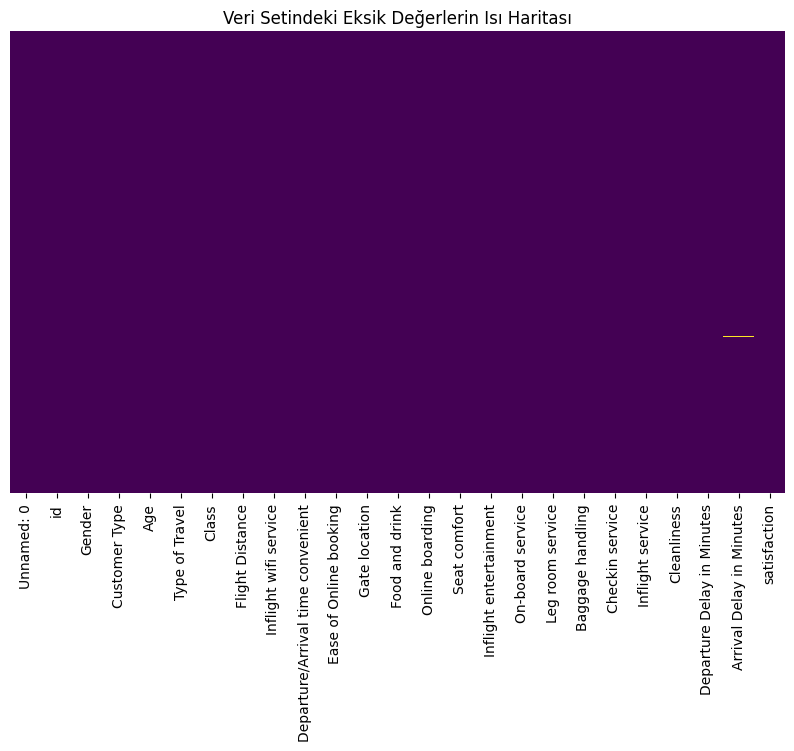

In [40]:
# Isı haritası
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Veri Setindeki Eksik Değerlerin Isı Haritası")
plt.show()


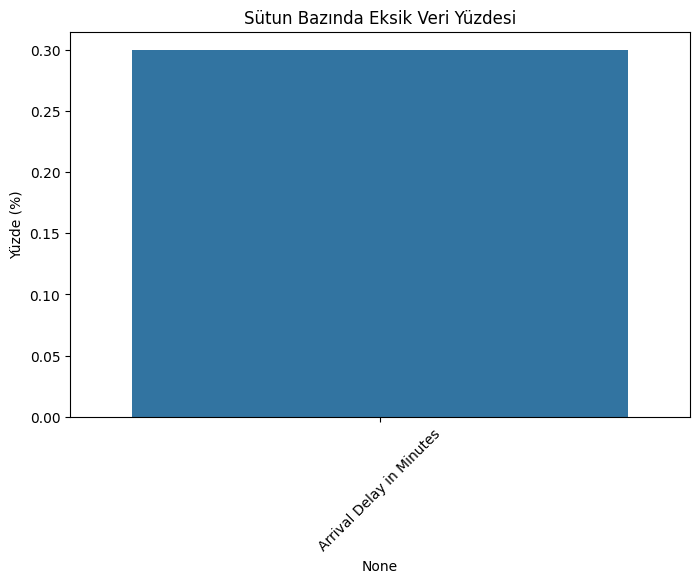

In [41]:
# Bar grafiği
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_df.index, y=missing_df["Yüzde (%)"])
plt.title("Sütun Bazında Eksik Veri Yüzdesi")
plt.ylabel("Yüzde (%)")
plt.xticks(rotation=45)
plt.show()


Veri setinde yalnızca `Arrival Delay in Minutes` sütununda eksik veri bulunduğu gözlemlenmiştir. Bu sütundaki eksik gözlem sayısı 310 olup, toplam veri setinin sadece **%0.3’üne** karşılık gelmektedir.

Eksik değerler:

- Sistemsel bir ölçüm hatasından kaynaklanıyor olabilir (örneğin, uçağın hiç gecikmeden zamanında iniş yapması gibi).
- Bu kadar düşük orandaki eksiklik, analiz veya modelleme sürecini ciddi şekilde etkilemeyecektir.

### Eksik Veri İşleme Kararı:

Eksik değerlerin oranı oldukça düşük olduğu için bu satırlar veri setinden **silinebilir (`dropna`)** veya **ortalama/medyan ile doldurulabilir (`fillna`)**. Bu projede:

`Arrival Delay in Minutes` sütunundaki eksik veriler, **medyan değer ile doldurularak** analiz sürecine dahil edilmiştir.


In [42]:
# Arrival Delay sütunundaki eksik verileri medyan ile dolduralım
median_arrival_delay = df["Arrival Delay in Minutes"].median()
df["Arrival Delay in Minutes"].fillna(median_arrival_delay, inplace=True)


# 🚨 Bölüm 4: Aykırı Değer (Outlier) Analizi

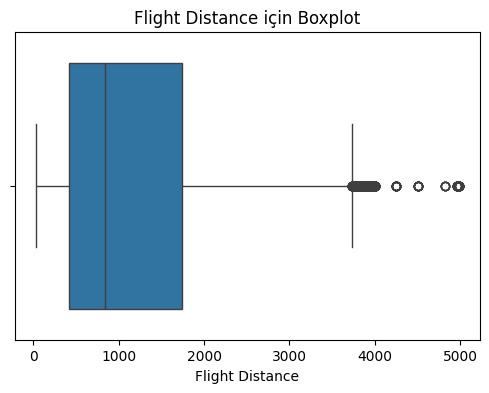

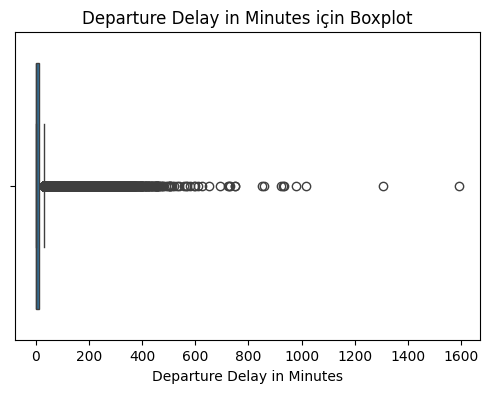

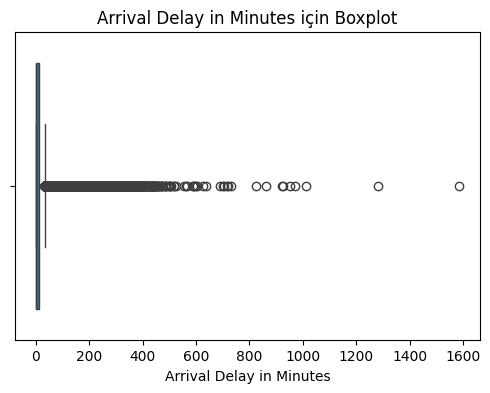

In [43]:
# İncelenecek sayısal değişkenler
outlier_columns = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Boxplot ile aykırı değerleri görselleştirme
for col in outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} için Boxplot")
    plt.xlabel(col)
    plt.show()


In [44]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

outliers_fd = detect_outliers_iqr(df, "Flight Distance")
print(f"Aykırı Flight Distance gözlemi sayısı: {len(outliers_fd)}")

Aykırı Flight Distance gözlemi sayısı: 2291


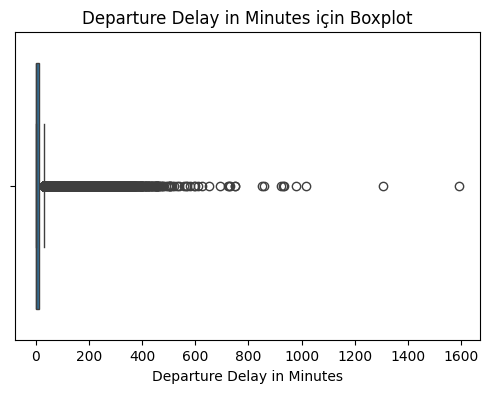

Aykırı Departure Delay in Minutes gözlemi sayısı: 14529


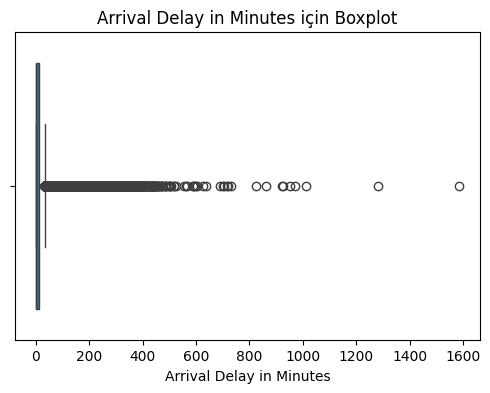

Aykırı Arrival Delay in Minutes gözlemi sayısı: 13954


In [45]:
# Aykırı değerleri tespit etme fonksiyonu
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Gecikmeler için boxplot ve outlier sayısı
for col in ["Departure Delay in Minutes", "Arrival Delay in Minutes"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} için Boxplot")
    plt.xlabel(col)
    plt.show()
    
    outliers = detect_outliers_iqr(df, col)
    print(f"Aykırı {col} gözlemi sayısı: {len(outliers)}")

Veri setindeki bazı sayısal değişkenlerde istatistiksel olarak uç değerler (outliers) tespit edilmiştir. Bu değerler, hem görselleştirme (boxplot) hem de IQR yöntemiyle analiz edilmiştir.

### İncelenen Değişkenler:
- `Flight Distance`
- `Departure Delay in Minutes`
- `Arrival Delay in Minutes`

### Bulgular:
- **Flight Distance** sütununda 4000 km üzerindeki uzun mesafeli uçuşlar aykırı olarak belirlenmiş olup, **2291 adet outlier** tespit edilmiştir.
- **Departure Delay** ve **Arrival Delay** sütunlarında da 200 dakikayı aşan gecikmeler aykırı olarak sınıflanmıştır.
- Bu değerlerin çoğu gerçekçi (örneğin uluslararası uçuşlar veya havaalanı kaynaklı aşırı gecikmeler) olduğundan, **veri kalitesini korumak adına silinmemiştir.**

### Sonuç:
Bu aykırı gözlemler, özellikle memnuniyet düzeyine olan etkileri açısından önem taşıyabilir. İleride yapılacak hipotez testleri ve modelleme aşamasında bu değerlerin rolü değerlendirilecektir.




# 📊 Bölüm 5: Görselleştirme ve Keşifsel Analiz

### Sayısal Değişkenler Arası Korelasyon

Aşağıdaki korelasyon matrisi, sayısal değişkenler arasında nasıl bir ilişki olduğunu göstermektedir.

- `Departure Delay` ile `Arrival Delay` arasında beklenen şekilde güçlü pozitif bir korelasyon gözlemlenmiştir.
- Diğer değişkenler (örneğin `Flight Distance`, `Age`) arasında düşük veya zayıf ilişkiler mevcuttur.
- Bu analiz, hangi değişkenlerin birbirine bağlı olabileceğini belirlemek açısından önemlidir.


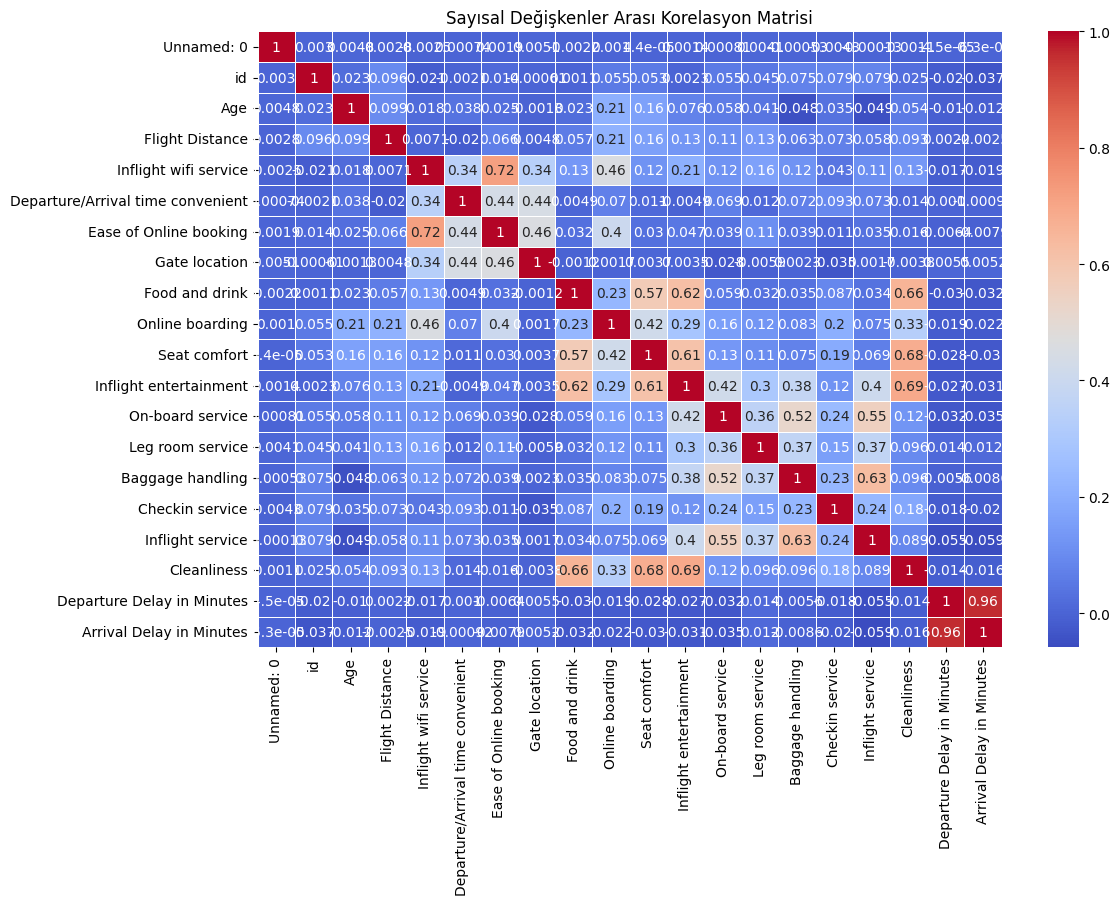

In [46]:
# Sadece sayısal değişkenleri alıyoruz
numeric_df = df.select_dtypes(include=np.number)

# Korelasyon matrisi ve heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()

### Sayısal Değişkenlerin Memnuniyet ile İlişkisi

Violinplot görselleri, sayısal değişkenlerin memnuniyet düzeyine göre dağılımını göstermektedir.

- `Flight Distance`: Her iki memnuniyet sınıfında benzer yayılım gözlenmiştir, ancak bazı uzak mesafe uçuşlarda memnuniyet daha yüksektir.
- `Departure Delay`: Memnun olmayan yolcuların gecikme süreleri daha yüksek görünmektedir, bu durum ileride hipotez testi ile detaylandırılacaktır.


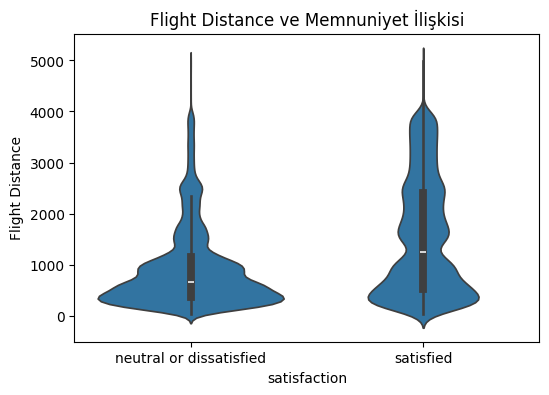

In [47]:
plt.figure(figsize=(6, 4))
sns.violinplot(x="satisfaction", y="Flight Distance", data=df)
plt.title("Flight Distance ve Memnuniyet İlişkisi")
plt.show()

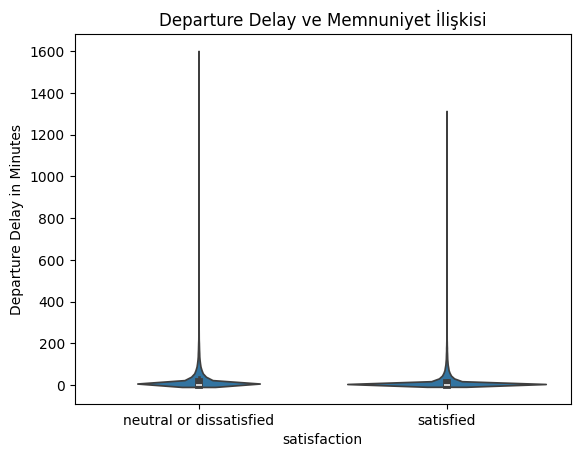

In [48]:
sns.violinplot(x="satisfaction", y="Departure Delay in Minutes", data=df)
plt.title("Departure Delay ve Memnuniyet İlişkisi")
plt.show()

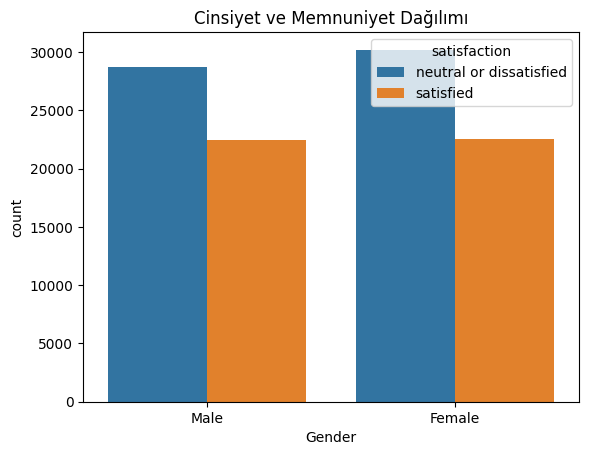

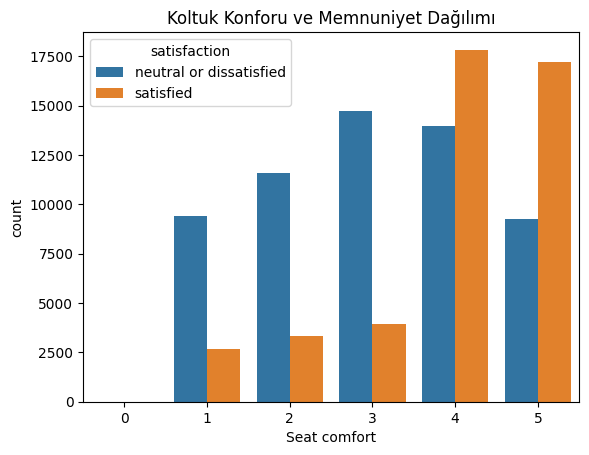

In [49]:
sns.countplot(x="Gender", hue="satisfaction", data=df)
plt.title("Cinsiyet ve Memnuniyet Dağılımı")
plt.show()

sns.countplot(x="Seat comfort", hue="satisfaction", data=df)
plt.title("Koltuk Konforu ve Memnuniyet Dağılımı")
plt.show()

# 🧪 Bölüm 6: Hipotez Testleri


## Hipotez Testi: Yolcu Sınıfı Memnuniyeti Etkiler mi?

**H0 (Null Hipotezi):** Yolcu sınıfı (Class), memnuniyet üzerinde anlamlı bir fark yaratmaz.  
**H1 (Alternatif Hipotez):** Yolcu sınıfı memnuniyet üzerinde anlamlı bir fark yaratır.

Yolcu sınıfı (`Class`) ve memnuniyet durumu (`satisfaction`) arasındaki ilişkiyi incelemek amacıyla Ki-Kare Testi uygulanmıştır.

| Test Sonucu | Değer |
|-------------|--------|
| Test İstatistiği | 26,471.86 |
| p-değeri | < 0.0001 |

### Yorum:
Elde edilen **p-değeri 0.0001’den küçük** olduğundan, H0 reddedilir.  
Bu sonuç, **Business class**, **Eco** ve **Eco Plus** sınıflarındaki yolcuların memnuniyet düzeylerinin **istatistiksel olarak anlamlı biçimde farklılık gösterdiğini** ortaya koymaktadır.

Özellikle görselleştirme analizinde de gözlemlendiği gibi, Business class yolcuları belirgin şekilde daha memnundur.


In [50]:
from scipy.stats import chi2_contingency

# Kontingensi tablosu
ct = pd.crosstab(df["Class"], df["satisfaction"])
chi2, p, dof, expected = chi2_contingency(ct)

print("Ki-Kare Testi Sonucu")
print(f"Test İstatistiği: {chi2}")
print(f"p-değeri: {p}")

Ki-Kare Testi Sonucu
Test İstatistiği: 26471.86294449228
p-değeri: 0.0


## Hipotez Testi: Gecikme Süresi Memnuniyeti Etkiler mi?

**H0:** Gecikme süresi ile memnuniyet arasında fark yoktur.  
**H1:** Gecikme süresi, memnuniyeti anlamlı biçimde etkiler.

İki bağımsız grup (memnun olanlar ve memnun olmayanlar) arasında ortalama gecikme süresi farkı olup olmadığını belirlemek için t-testi uygulanmıştır.

| Test Sonucu | Değer |
|-------------|--------|
| Test İstatistiği | -16.57 |
| p-değeri | < 0.0001 |

### Yorum:
Elde edilen p-değeri `0.0001`'den çok küçük olduğu için **H0 reddedilir**.  
Bu sonuç, memnun olan yolcuların ortalama gecikme süresinin **anlamlı biçimde daha düşük** olduğunu göstermektedir.

Kısaca: **Gecikme arttıkça memnuniyet düşmektedir.**


In [51]:
from scipy.stats import ttest_ind

# Grupları ayırıyoruz
satisfied = df[df["satisfaction"] == "satisfied"]["Departure Delay in Minutes"]
not_satisfied = df[df["satisfaction"] == "neutral or dissatisfied"]["Departure Delay in Minutes"]

# t-testi
t_stat, p_val = ttest_ind(satisfied, not_satisfied, equal_var=False)

print("t-testi Sonucu:")
print(f"Test İstatistiği: {t_stat}")
print(f"p-değeri: {p_val}")

t-testi Sonucu:
Test İstatistiği: -16.574821725609695
p-değeri: 1.2767076513246781e-61


## Hipotez Testi: Sadık Müşteriler Daha mı Memnun?

**H0:** Sadakat (loyalty) ile memnuniyet arasında ilişki yoktur.  
**H1:** Sadık müşteriler daha memnundur.

`Customer Type` ile `satisfaction` arasındaki ilişkiyi test etmek için Ki-Kare testi uygulanmıştır.

| Test Sonucu | Değer |
|-------------|--------|
| Test İstatistiği | 3,657.28 |
| p-değeri | < 0.0001 |

### Yorum:
Elde edilen p-değeri oldukça küçüktür ve **H0 reddedilir**.  
Bu da sadık müşterilerin memnuniyet düzeylerinin, sadık olmayan müşterilere kıyasla **istatistiksel olarak anlamlı biçimde daha yüksek** olduğunu göstermektedir.

Kısaca: **Sadakat = Memnuniyet.**


In [52]:
# Kontingensi tablosu
ct_loyalty = pd.crosstab(df["Customer Type"], df["satisfaction"])
chi2, p_loyalty, _, _ = chi2_contingency(ct_loyalty)

print("Ki-Kare Testi (Sadakat):")
print(f"Test İstatistiği: {chi2}")
print(f"p-değeri: {p_loyalty}")

Ki-Kare Testi (Sadakat):
Test İstatistiği: 3657.2808045981465
p-değeri: 0.0


# 🤖 Bölüm 7: Mini Modelleme – Memnuniyet Tahmini


## Mini Modelleme: Yolcu Memnuniyetini Tahmin Etme

Projenin son adımında, yolcuların uçuş deneyimiyle ilgili değerlendirmeleri kullanılarak memnun olup olmayacaklarını tahmin eden bir **Logistic Regression** modeli uygulanmıştır.

### Başlıca Sonuçlar:

- **Accuracy:** %86.8
- **Confusion Matrix:**
  - 10.424 doğru negatif (memnun olmayan doğru sınıflanmış)
  - 7.612 doğru pozitif (memnun olan doğru sınıflanmış)

### Yorum:
Model oldukça yüksek doğrulukta çalışmakta ve her iki sınıfta da dengeli sonuçlar vermektedir. Özellikle basit bir model kullanılmasına rağmen, memnuniyet tahmini açısından oldukça başarılı olmuştur.

Daha ileri adımlar için:
- Daha karmaşık modeller (Random Forest, XGBoost)
- Özellik seçimi ve mühendisliği
- AUC-ROC analizleri

eklenerek performans artırılabilir.


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df_model = df.copy()
df_model["satisfaction"] = df_model["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})

cat_cols = df_model.select_dtypes(include='object').columns
for col in cat_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

X = df_model.drop(["satisfaction", "id", "Unnamed: 0"], axis=1, errors='ignore')
y = df_model["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8679081853616284

Confusion Matrix:
 [[10424  1289]
 [ 1456  7612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     11713
           1       0.86      0.84      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.87     20781
weighted avg       0.87      0.87      0.87     20781



# ✅ Bölüm 8: Sonuçlar ve Öneriler


## 📊 Genel Değerlendirme

Bu projede, "Airline Passenger Satisfaction" veri seti kullanılarak yolcu memnuniyetini etkileyen faktörler detaylı bir şekilde analiz edilmiştir. Projenin temel adımları şunlardır:

- Veri ön işleme, eksik ve aykırı değer analizleri
- Sayısal ve kategorik değişkenler için istatistiksel özetler ve görselleştirme
- Memnuniyet üzerindeki etkileri belirlemek amacıyla hipotez testleri
- Logistic Regression modeli ile memnuniyet tahmini

## 🔬 Öne Çıkan Bulgular

- **Yolcu sınıfı**, memnuniyet üzerinde anlamlı etkiye sahiptir. Business class yolcuları belirgin şekilde daha memnundur (*p < 0.0001*).
- **Gecikme süreleri**, memnuniyet düzeyini düşüren önemli bir etkendir. Memnun olmayan yolcuların ortalama kalkış gecikmesi anlamlı biçimde daha yüksektir (*p < 0.0001*).
- **Sadakat (loyalty)**, memnuniyetle güçlü şekilde ilişkilidir. Sadık müşteriler büyük oranda memnundur (*p < 0.0001*).
- Korelasyon analizlerinde `Departure` ve `Arrival Delay` arasında güçlü ilişki tespit edilmiştir.

## 🤖 Modelleme Sonuçları

- **Logistic Regression** modeli %86.8 doğrulukla çalışmıştır.
- Model hem memnun hem memnun olmayan yolcuları dengeli biçimde tahmin etmiştir.
- Gelişmiş modellerle bu başarı daha da artırılabilir.

## ✅ Öneriler

- **Business class yatırımları** artırılarak memnuniyet oranı yükselebilir.
- **Gecikme kaynaklı sorunlar** operasyonel iyileştirmelerle azaltılmalı.
- **Sadık müşterilere özel teklifler**, memnuniyet ve bağlılığı birlikte artırabilir.
- Veri analizine dayalı **müşteri segmentasyonu**, hedefli pazarlama stratejileri için uygulanabilir.

---

## 🎯 Genel Sonuç:

Bu analiz sayesinde, havayolu firmaları hem operasyonel hem pazarlama stratejilerini **veriye dayalı kararlarla şekillendirebilir** ve yolcu memnuniyetini artırma konusunda somut adımlar atabilir.
